# Semos Education - Titanic Adventure Workshop

**Datum:** 14.8.2023  
**Trener:** Stefan Krstović ([mail](mailto:stefan.krstovic@semosedu.com), [LinkedIn](https://www.linkedin.com/in/stefankrstovic/))

Uvod u analizu podataka kroz programski jezik Python na primeru Titanic seta podataka [1].  
Da biste pokrenuli kod, potrebno je da preuzmete Titanic dataset (za ovu radionicu je dovoljno preuzeti _train.csv_).

_Ova datoteka, njen sadržaj i snimak radionice su vlasništvo kompanije Semos Education Srbija. Navedene materijale je dozvoljeno koristiti u svrhe učenja, odnosno obnavljanja gradiva pređenog na radionici. Molimo vas da nam se obratite u slučaju da želite da ih upotrebite na bilo koji drugi način._

[1] Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic

## Pristupanje podacima

Učitavanje seta podataka sa kojim ćemo raditi.

In [1]:
import pandas as pd

# train.csv datoteku treba sačuvati u folderu korisnika. U slučaju da niste sigurni gde treba da je sačuvate,
# odkomentarišite i pokrenite sledeći kod:

# import os
# print(f'Datoteku treba da sačuvate u sledećem folderu: {os.getcwd()}')

podaci = pd.read_csv('train.csv')

## Upoznavanje sa podacima

Prvo treba da saznamo osnovne stvari o podacima:
- kako izgleda naš set podataka
- koliko ima redova i kolona
- kako se kolone zovu, kog su tipa i šta znače
- deskriptivna statistika
- neobične (_outlier_) i nedostajuće vrednosti

In [2]:
# podaci
podaci.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
podaci.shape

(891, 12)

In [4]:
podaci.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
numericke = list(podaci.select_dtypes(['int64', 'float64']).columns)
izlazna = numericke.pop(1)
tekstualne = list(podaci.select_dtypes('object').columns)

numericke, tekstualne, izlazna

(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 'Survived')

In [6]:
podaci.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


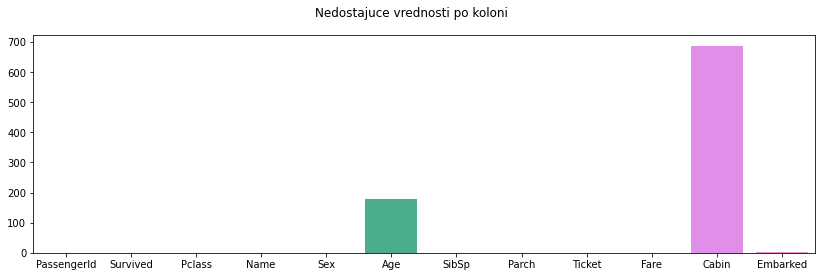

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 14, 4
plt.suptitle('Nedostajuce vrednosti po koloni')

nedostajuce = podaci.isnull().sum()
sns.barplot(x = nedostajuce.index, y = nedostajuce)

plt.show()

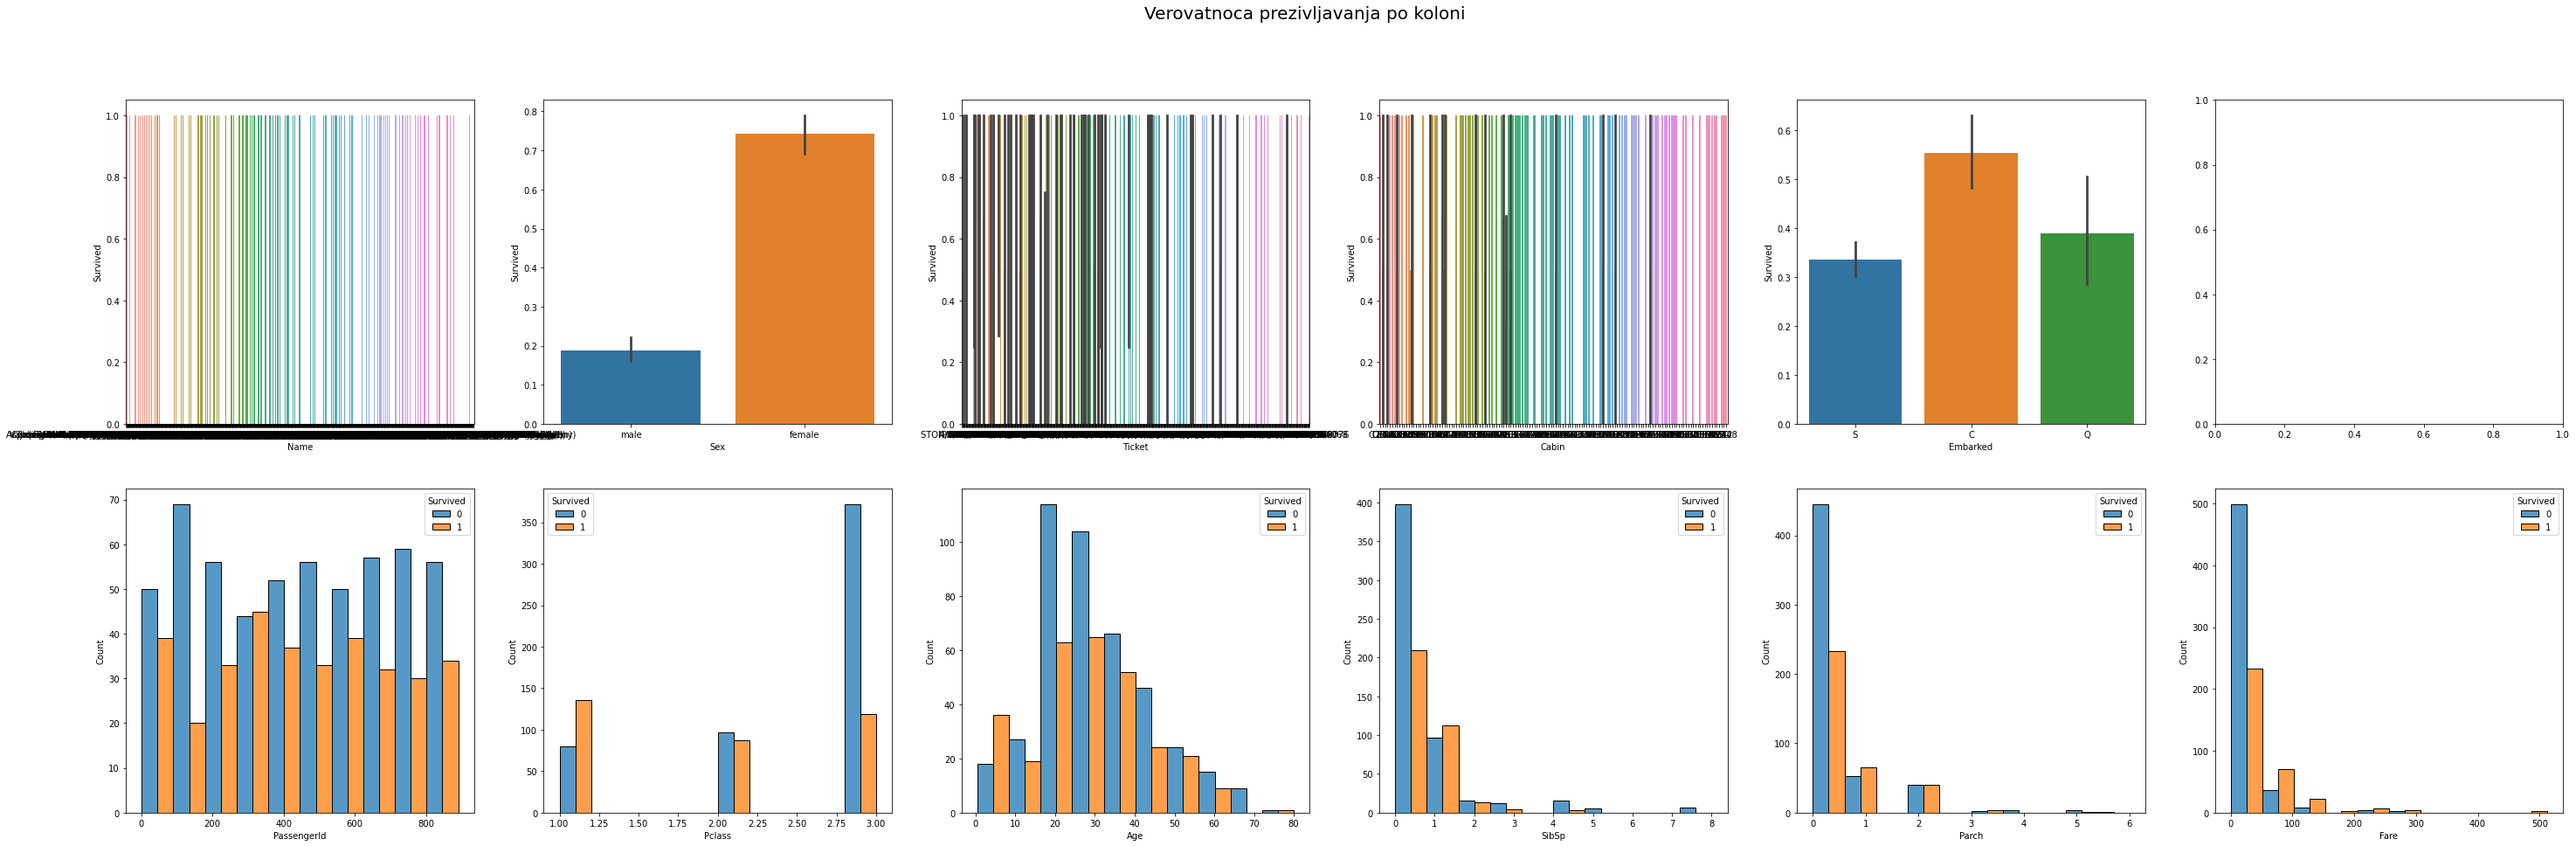

In [8]:
plt.rcParams['figure.figsize'] = 50, 15

fig, ax = plt.subplots(2, 6)
fig.suptitle('Verovatnoca prezivljavanja po koloni', fontsize = 20)

for kol, a in zip(tekstualne, ax[0]):
    sns.barplot(x = podaci[kol], y = podaci[izlazna], ax = a)
    
for kol, a in zip(numericke, ax[1]):
    sns.histplot(x = podaci[kol], hue = podaci[izlazna], ax = a, multiple = 'dodge', bins = 10)

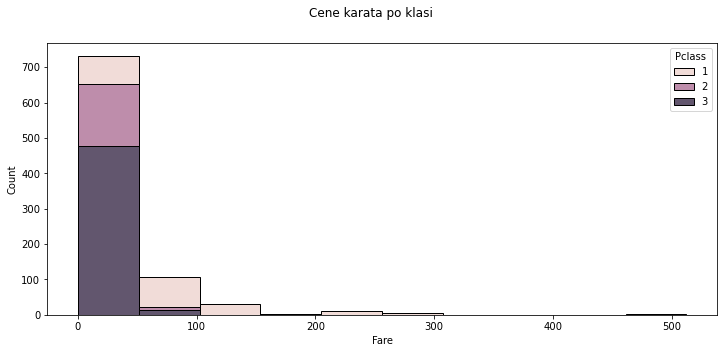

In [9]:
plt.rcParams['figure.figsize'] = 12, 5
plt.suptitle('Cene karata po klasi')

sns.histplot(podaci, x = 'Fare', hue = 'Pclass', bins = 10, multiple = 'stack')

plt.show()

## Čišćenje podataka

Potrebno je upravljati nedostajućim vrednostima i _outlier_-ima (uklanjanje redova/kolona, imputacija).  
Na ovoj radionici se kolone sa nedostajućim vrednostima neće koristiti, a _outlier_-i nisu primećeni.

In [10]:
bez_nedostajucih = podaci.columns[podaci.notnull().all(axis = 0)]
korisne = ['Sex', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch']

kolone_za_algoritam = sorted(list(set(bez_nedostajucih).intersection(set(korisne))))
kolone_za_algoritam

['Parch', 'Pclass', 'Sex', 'SibSp']

## Analiziranje podataka i interpretacija rezultata

Prvo ćemo naslikati nekoliko jednostavnih grafikona.  
Nakon toga ćemo koristiti algoritam Stablo odlučivanja.

### Grafikoni

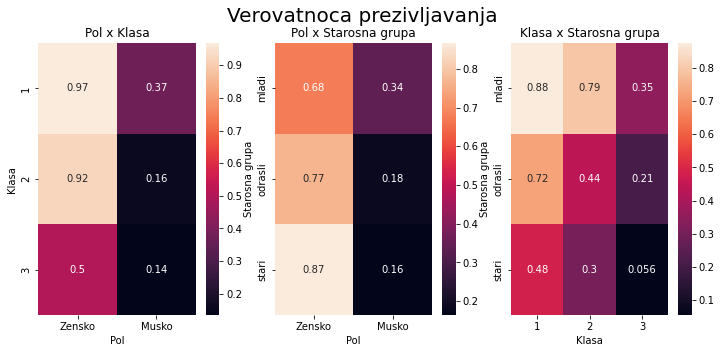

In [11]:
fig, ax = plt.subplots(1, 3)
plt.rcParams['figure.figsize'] = 16, 7
fig.suptitle('Verovatnoca prezivljavanja', fontsize = 20)

pivot_sex_pclass = podaci.groupby(['Pclass', 'Sex']).Survived.mean().reset_index().pivot(index = 'Pclass', columns = 'Sex')
sns.heatmap(pivot_sex_pclass, annot = True, ax = ax[0], xticklabels = ['Zensko', 'Musko'])
ax[0].set(title = 'Pol x Klasa', xlabel = 'Pol', ylabel = 'Klasa')

podaci['st_grupa'] = pd.cut(x = podaci.Age, bins = [0, 18, 45, 100], labels = ['mladi', 'odrasli', 'stari'])

pivot_age_sex = podaci.groupby(['st_grupa', 'Sex']).Survived.mean().reset_index().pivot(index = 'st_grupa', columns = 'Sex')
sns.heatmap(pivot_age_sex, annot = True, ax = ax[1], xticklabels = ['Zensko', 'Musko'])
ax[1].set(title = 'Pol x Starosna grupa', xlabel = 'Pol', ylabel = 'Starosna grupa')

pivot_age_pclass = podaci.groupby(['st_grupa', 'Pclass']).Survived.mean().reset_index().pivot(index = 'st_grupa', columns = 'Pclass')
sns.heatmap(pivot_age_pclass, annot = True, ax = ax[2], xticklabels = [1, 2, 3])
ax[2].set(title = 'Klasa x Starosna grupa', xlabel = 'Klasa', ylabel = 'Starosna grupa')

plt.show()

### Stablo odlučivanja

In [12]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(podaci[kolone_za_algoritam], drop_first = True)
print(X.head())
kolone_lep_naziv = ['DecRod', 'Klasa', 'BrtSestSupr', 'Musko']
X.columns = kolone_lep_naziv

y = podaci[izlazna]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1111)

   Parch  Pclass  SibSp  Sex_male
0      0       3      1         1
1      0       1      1         0
2      0       3      0         0
3      0       1      1         0
4      0       3      0         1


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

stablo_odlucivanja = DecisionTreeClassifier(max_depth=4, random_state = 1111)

stablo_odlucivanja.fit(X_train, y_train)
pred = stablo_odlucivanja.predict(X_test)

print('Tacnost algoritma je {:.2%}'.format(accuracy_score(y_test, pred)))

Tacnost algoritma je 81.61%


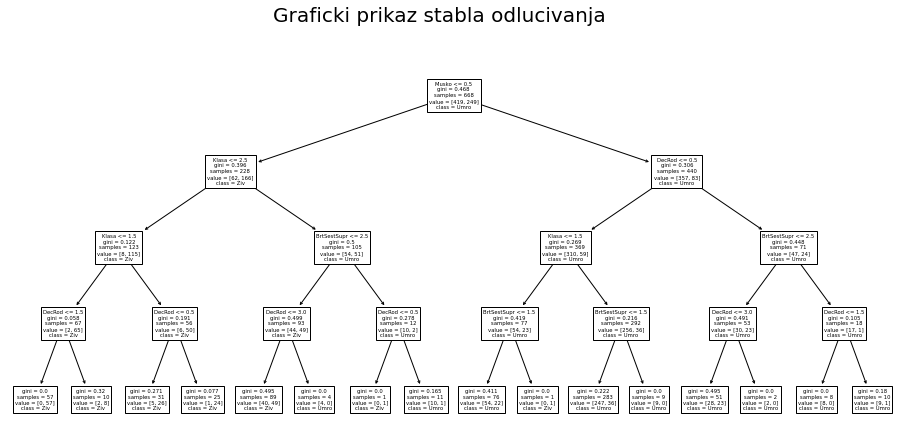

In [14]:
from sklearn.tree import plot_tree

plt.suptitle('Graficki prikaz stabla odlucivanja', fontsize = 20)
plt.rcParams['figure.figsize'] = 30, 15

plot_tree(stablo_odlucivanja, feature_names = kolone_lep_naziv, class_names = ['Umro', 'Ziv'])

plt.show()

#### Predviđanje novih obzervacija

In [15]:
#'DecRod', 'Klasa', 'BrtSestSupr', 'Musko'

novi_test = X_test.iloc[0:0].copy()

novi_test.loc['Milica'] = [1, 0, 1, 0]
novi_test.loc['Mirko'] = [2, 2, 1, 1]
novi_test.loc['Nemanja'] = [1, 0, 3, 1]

stablo_odlucivanja.predict(novi_test)

# stablo_odlucivanja.predict([[1, 0, 3, 1]])

array([1, 0, 0], dtype=int64)